In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import OneHotEncoder

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.combine import SMOTEENN
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://github.com/satz2000/End-to-end-project---Customer-churn/raw/main/Telco-Customer-Churn.csv')

In [3]:
data.sample(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3972,5382-TEMLV,Male,0,No,No,45,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),50.90,2298.55,No
3859,1732-FEKLD,Female,0,No,No,54,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,One year,Yes,Bank transfer (automatic),94.75,5121.75,No


In [4]:
data.shape

(7043, 21)

In [5]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In the dataset customerID doesn't provide any valueable information so we simply drop it using drop method

In [8]:
data.drop('customerID',axis = 1, inplace = True)

In [9]:
#After analysis found that there is a empty string here frequency is 11.
data['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [10]:
#So we need to covert TotalCharges column into float and empty string will becomes Null values then we fill it using fillna
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce')

After analysis the data we found we notice that some of the independent columns are in numerical and some are categorical 
so for performing EDA we need to seperate it into numerical and categorical.

In [11]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

print(f'Numerical features count is : {len(numerical_features)}')
print(f'Numberical features are : {numerical_features}')

Numerical features count is : 4
Numberical features are : ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [12]:
categorical_features = [feature for feature in data.columns if data[feature].dtypes =='O']

print(f'Categorical features count is : {len(categorical_features)}')
print(f'Categorical features are : {categorical_features}')

Categorical features count is : 16
Categorical features are : ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


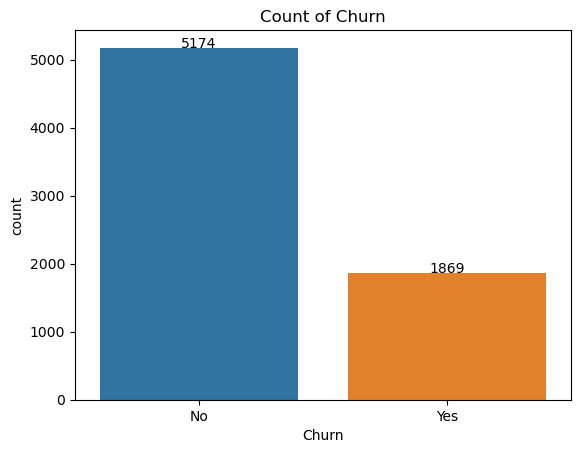

In [13]:
ax = sns.countplot(data, x = 'Churn')
for i, v in enumerate(data['Churn'].value_counts().values):
    ax.text(i, v + 0.1, str(v), ha='center')
plt.title('Count of Churn')
plt.show()

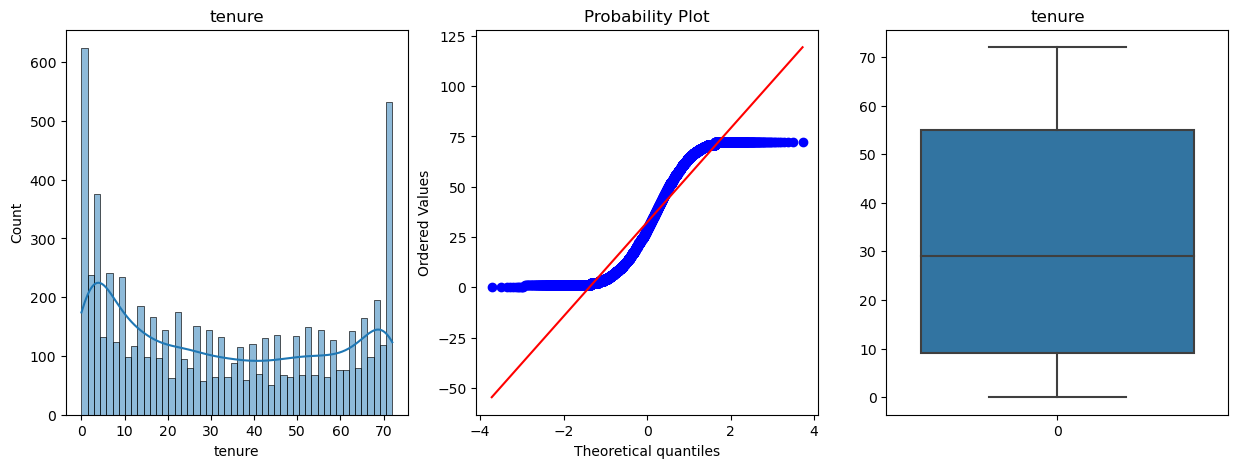

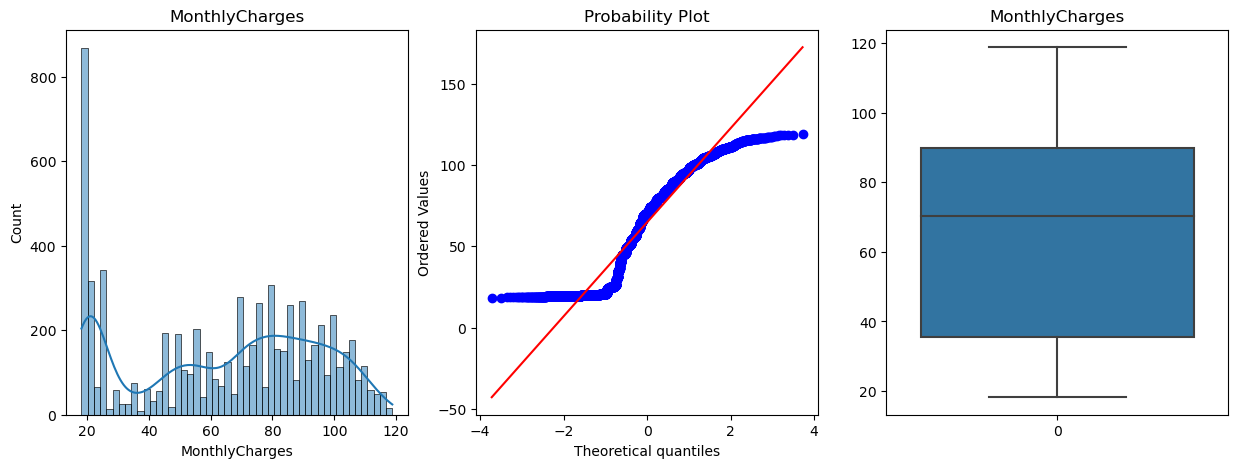

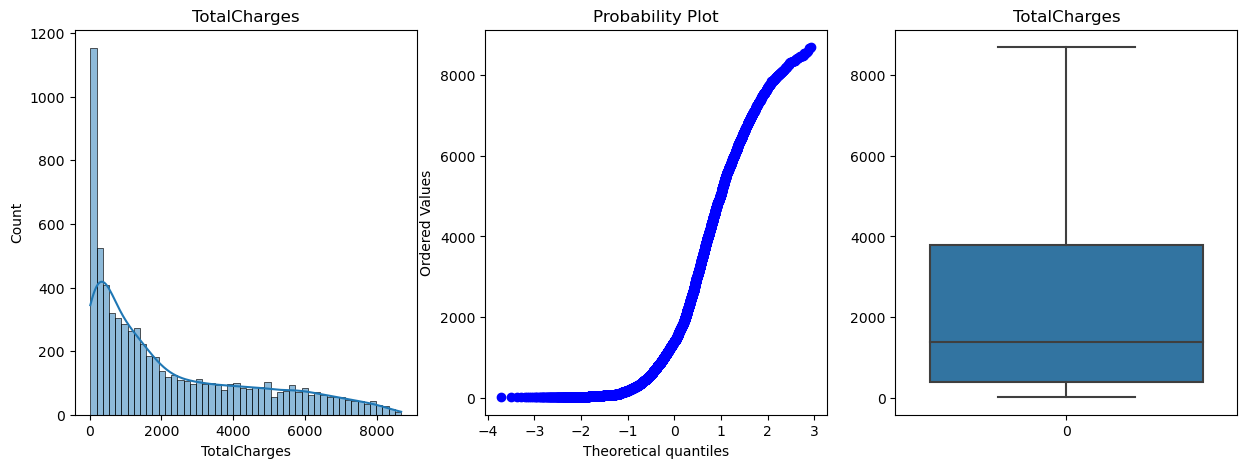

In [14]:
for i in numerical_features:
    
    if i != 'SeniorCitizen':
        plt.figure(figsize=(15,5))
    
        plt.subplot(1,3,1)
        plt.title(i)
        sns.histplot(data[i], bins=50, kde = True)
    
        plt.subplot(1,3,2)
        plt.title(i)
        stats.probplot(data[i], dist = 'norm',plot=plt)
    
        plt.subplot(1,3,3)
        plt.title(i)
        sns.boxplot(data[i])
    
        plt.show()

After ploting this histogram probability distribution, boxplot to find the outliers but our dataset doesn't have any outliers, so we don't need to remove the outliers.

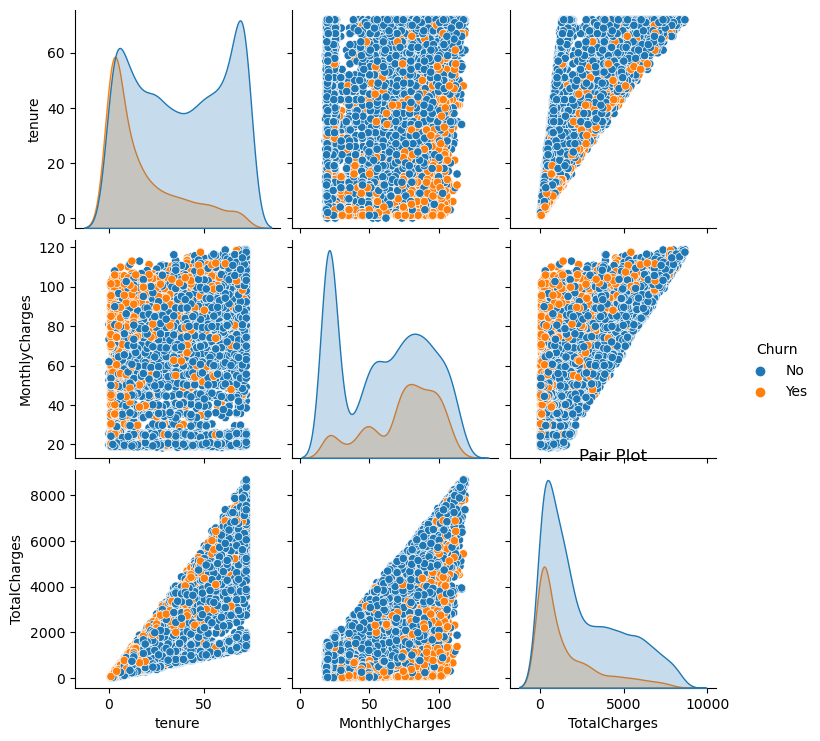

In [15]:
sns.pairplot(data.drop('SeniorCitizen',axis=1), hue = 'Churn')
plt.title('Pair Plot')
plt.show()

<Axes: title={'center': 'Senior Citizen %'}, ylabel='SeniorCitizen'>

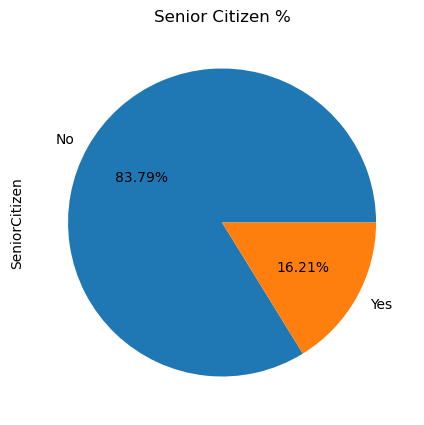

In [16]:
(data['SeniorCitizen'].value_counts()*100/len(data)).plot.pie(labels = ['No','Yes'],
                                                             autopct = '%.2f%%', title = 'Senior Citizen %',
                                                             figsize = (13,5))

As we can see in the pie chart most of the customers are young of total 83.79% remaining are Senior Citizen around 16.21%.

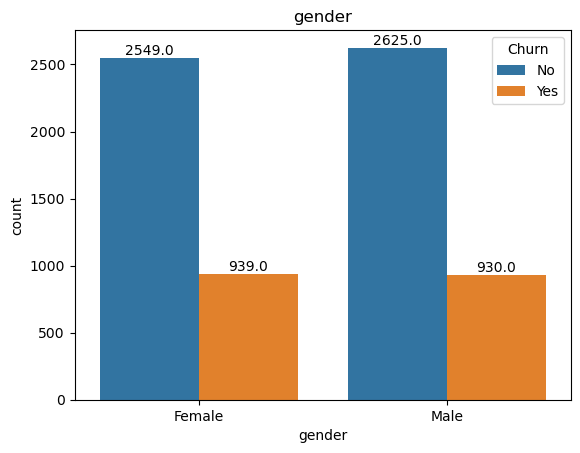

<Figure size 1200x600 with 0 Axes>

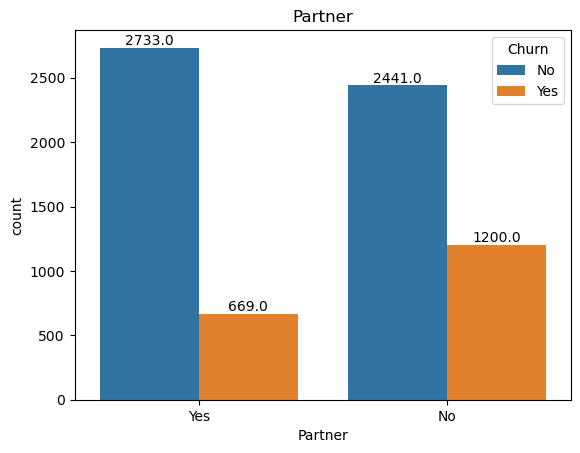

<Figure size 1200x600 with 0 Axes>

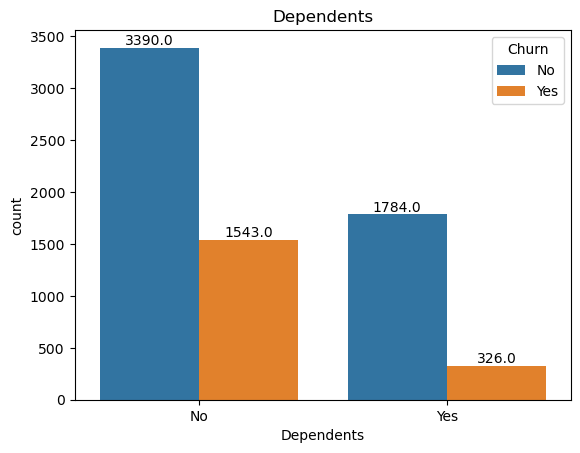

<Figure size 1200x600 with 0 Axes>

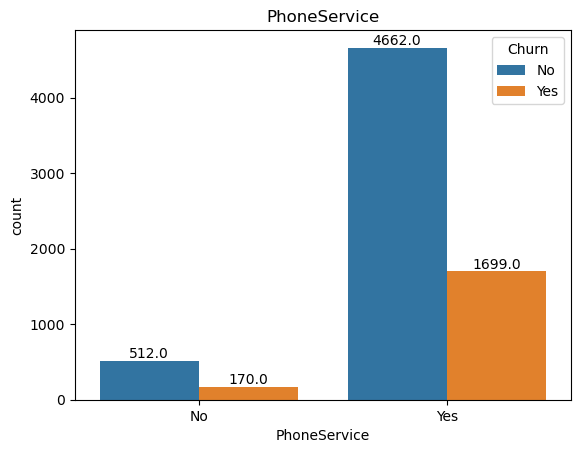

<Figure size 1200x600 with 0 Axes>

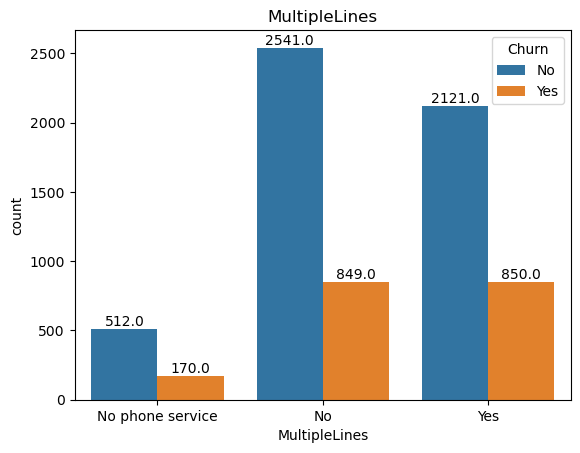

<Figure size 1200x600 with 0 Axes>

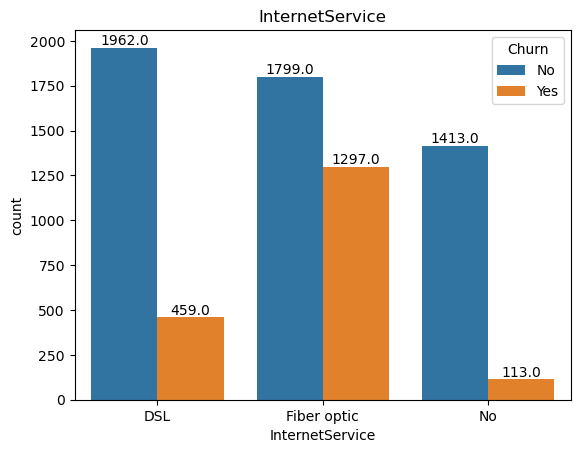

<Figure size 1200x600 with 0 Axes>

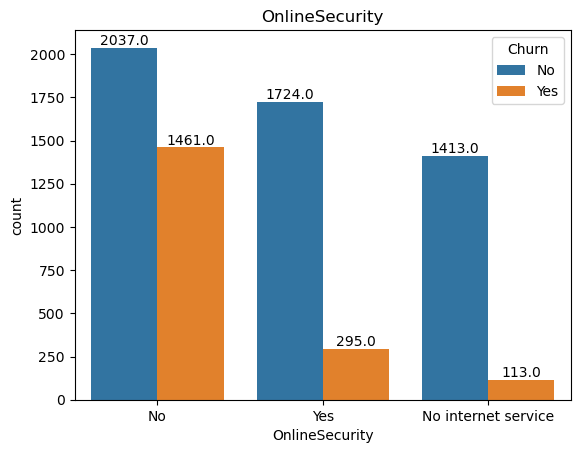

<Figure size 1200x600 with 0 Axes>

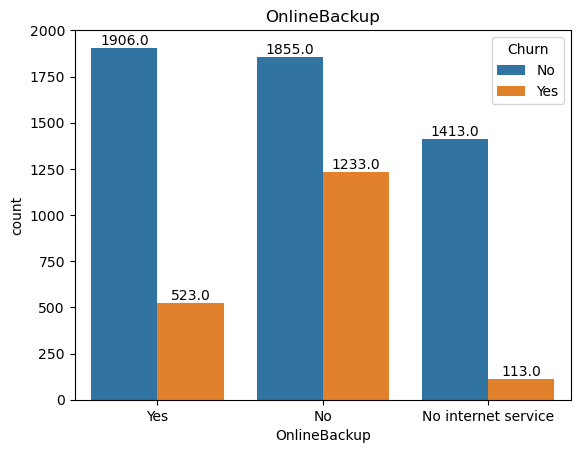

<Figure size 1200x600 with 0 Axes>

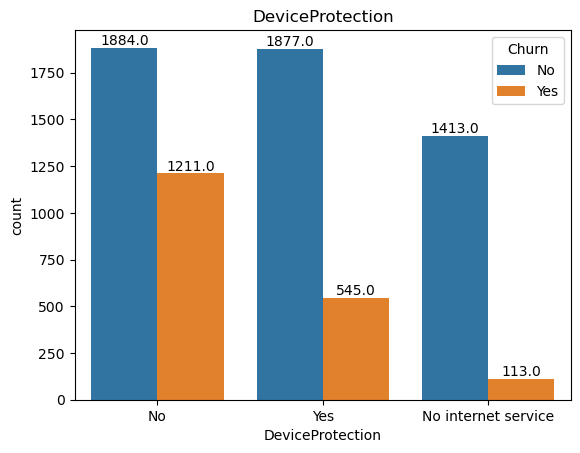

<Figure size 1200x600 with 0 Axes>

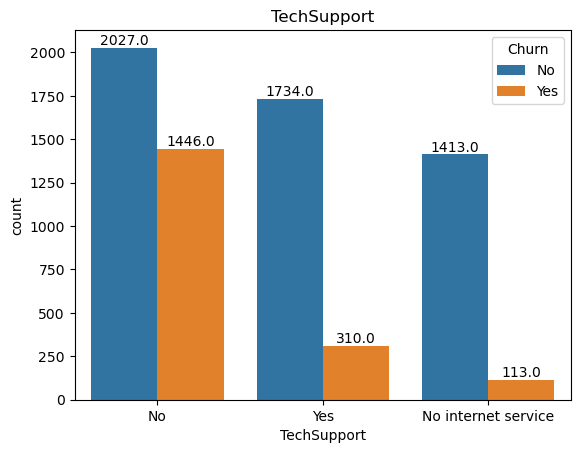

<Figure size 1200x600 with 0 Axes>

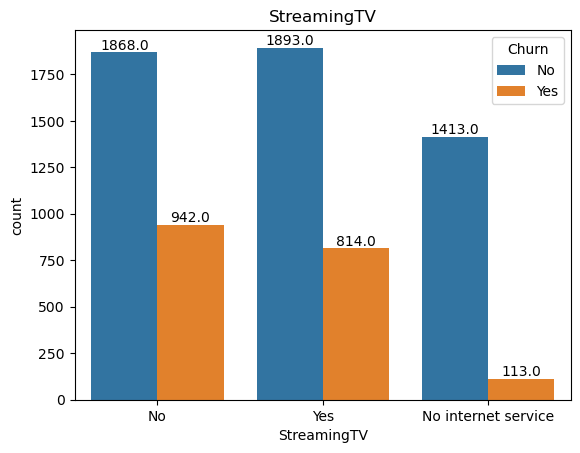

<Figure size 1200x600 with 0 Axes>

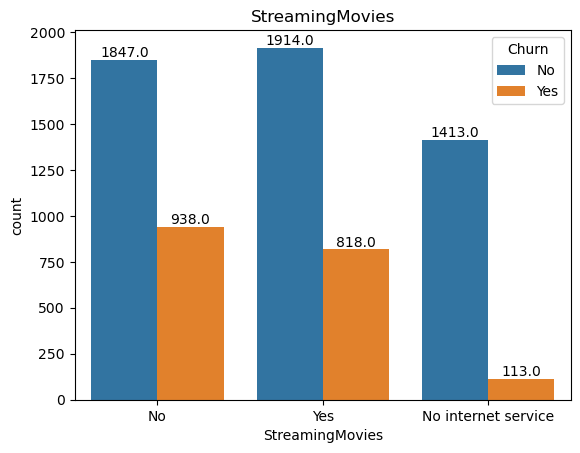

<Figure size 1200x600 with 0 Axes>

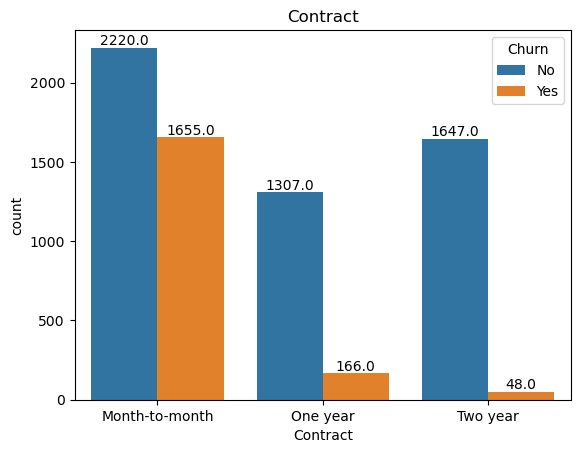

<Figure size 1200x600 with 0 Axes>

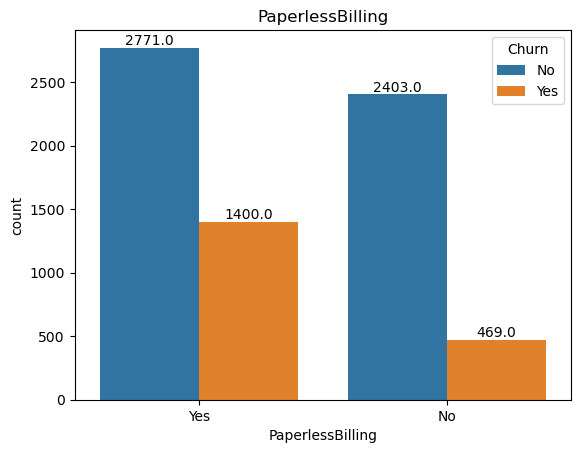

<Figure size 1200x600 with 0 Axes>

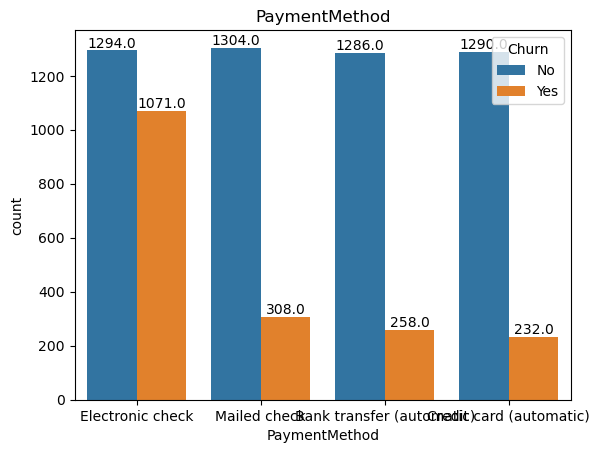

<Figure size 1200x600 with 0 Axes>

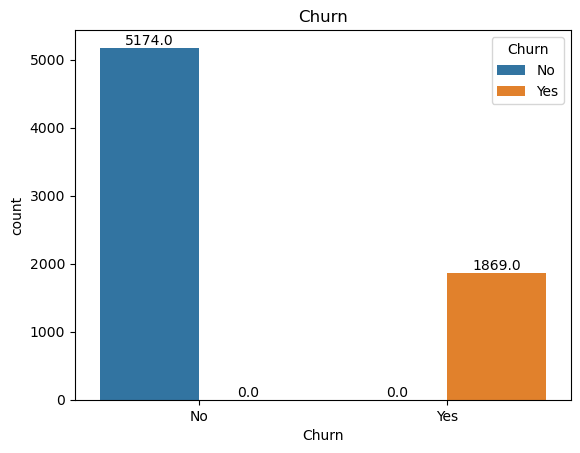

<Figure size 1200x600 with 0 Axes>

In [17]:
for i, feature in enumerate(categorical_features):
    ax = sns.countplot(data, x=feature, hue = 'Churn')
    plt.title(feature)
    plt.figure(figsize=(12,6))
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() /2., p.get_height()),
                     ha='center', va='center',xytext=(0, 5), textcoords='offset points')
    plt.show()

# Data Cleaning

In [18]:
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

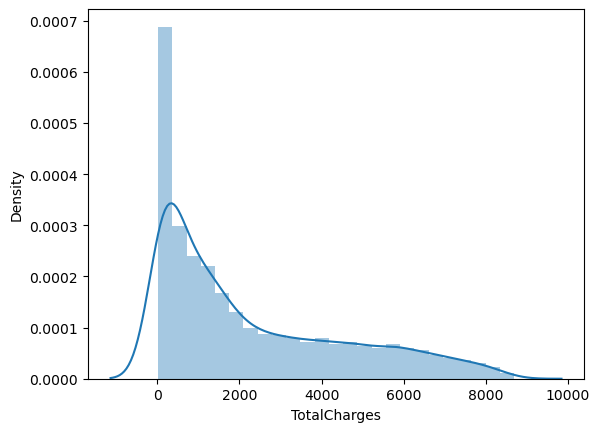

In [19]:
sns.distplot(data['TotalCharges'])
plt.show()

In [20]:
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())

In [21]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
#Coverting categorical data into numerical for the model building
ohe = OneHotEncoder()
for feature in categorical_features:
    data[feature] = ohe.fit_transform(data[feature].values.reshape(-1,1)).toarray()

<Axes: >

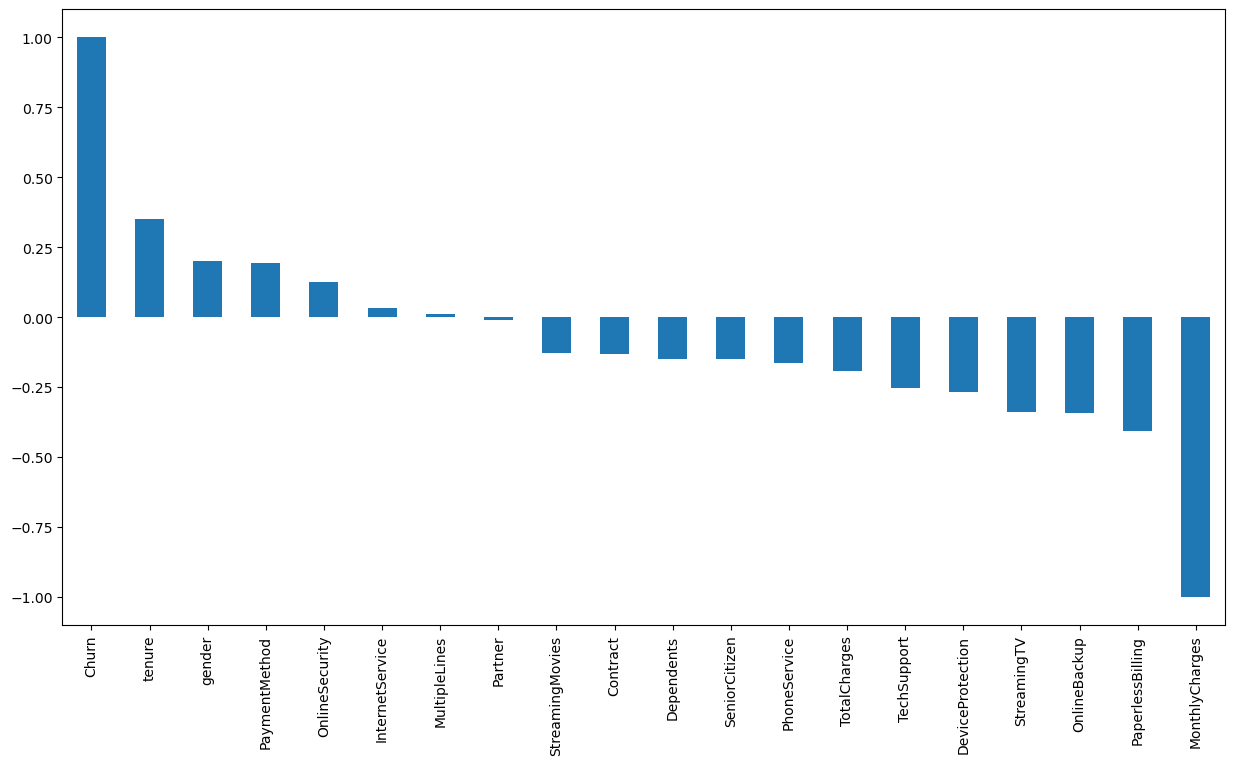

In [23]:
#Get correlation of churn with other variables.
plt.figure(figsize=(15,8))
data.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar')

<Axes: >

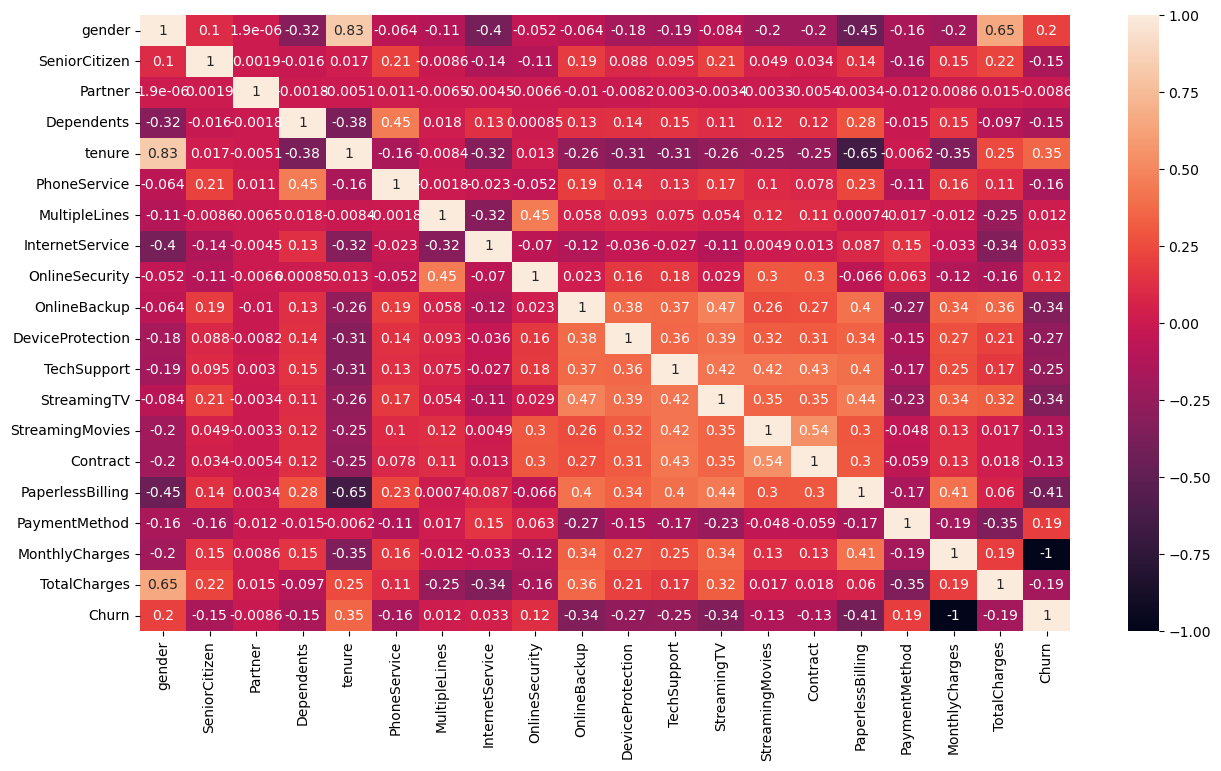

In [24]:
#Finding the correlation between the independent and dependent variable.
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot = True)

In [25]:
#Splitting the data into independent and dependent variable.
X = data.drop('Churn', axis = 1)
y = data['Churn']

In [26]:
#Select the top 10 best feature using SelectKBest by default = 10 feature
selection = SelectKBest()
X = selection.fit_transform(X,y)

In [27]:
#imbalanced dataset
y.value_counts()

1.0    5174
0.0    1869
Name: Churn, dtype: int64

In [28]:
#Here we can see which feature is taken showing true and removed showing False.
selection.get_support()

array([False, False, False,  True,  True, False, False, False,  True,
        True,  True,  True, False, False,  True,  True, False,  True,
        True])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [30]:
X_train.shape, X_test.shape

((5634, 10), (1409, 10))

In [31]:
y_train.shape, y_test.shape

((5634,), (1409,))

In [32]:
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)


print('Accuracy Score : ', accuracy_score(y_test, y_pred))
print('Confusion Matrix : \n', confusion_matrix(y_test, y_pred))
print('Classification Report : ',classification_report(y_test, y_pred))

Accuracy Score :  0.7984386089425124
Confusion Matrix : 
 [[201 186]
 [ 98 924]]
Classification Report :                precision    recall  f1-score   support

         0.0       0.67      0.52      0.59       387
         1.0       0.83      0.90      0.87      1022

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [33]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)


print('Accuracy Score : ', accuracy_score(y_test, y_pred))
print('Confusion Matrix : \n', confusion_matrix(y_test, y_pred))
print('Classification Report : ',classification_report(y_test, y_pred))

Accuracy Score :  0.7324343506032647
Confusion Matrix : 
 [[186 201]
 [176 846]]
Classification Report :                precision    recall  f1-score   support

         0.0       0.51      0.48      0.50       387
         1.0       0.81      0.83      0.82      1022

    accuracy                           0.73      1409
   macro avg       0.66      0.65      0.66      1409
weighted avg       0.73      0.73      0.73      1409



In [34]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)


print('Accuracy Score : ', accuracy_score(y_test, y_pred))
print('Confusion Matrix : \n', confusion_matrix(y_test, y_pred))
print('Classification Report : ',classification_report(y_test, y_pred))

Accuracy Score :  0.7899219304471257
Confusion Matrix : 
 [[190 197]
 [ 99 923]]
Classification Report :                precision    recall  f1-score   support

         0.0       0.66      0.49      0.56       387
         1.0       0.82      0.90      0.86      1022

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [35]:
st = SMOTEENN()
X_train_st, y_train_st = st.fit_resample(X_train, y_train)
print('Number of classes before fit {}'.format(Counter(y_train)))
print('Number of classes after fit {}'.format(Counter(y_train_st)))

Number of classes before fit Counter({1.0: 4152, 0.0: 1482})
Number of classes after fit Counter({0.0: 2417, 1.0: 2186})


In [36]:
#splitting over sampling data
X_train_sp, X_test_sp, y_train_sp, y_test_sp = train_test_split(X_train_st, y_train_st, test_size=0.2)

In [37]:
dtc_sp = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=7, min_samples_leaf=15)
dtc_sp.fit(X_train_sp, y_train_sp)
y_pred_sp = dtc_sp.predict(X_test_sp)


print('Accuracy Score : ', accuracy_score(y_test_sp, y_pred_sp))
print('Confusion Matrix : \n', confusion_matrix(y_test_sp, y_pred_sp))
print('Classification Report : ',classification_report(y_test_sp, y_pred_sp))

Accuracy Score :  0.9457111834961998
Confusion Matrix : 
 [[479  23]
 [ 27 392]]
Classification Report :                precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       502
         1.0       0.94      0.94      0.94       419

    accuracy                           0.95       921
   macro avg       0.95      0.94      0.95       921
weighted avg       0.95      0.95      0.95       921



In [38]:
rfc_sp = RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=15, min_samples_leaf=10, min_samples_split=6)
rfc_sp.fit(X_train_sp, y_train_sp)
y_pred_sp = rfc_sp.predict(X_test_sp)


print('Accuracy Score : ', accuracy_score(y_test_sp, y_pred_sp))
print('Confusion Matrix : \n', confusion_matrix(y_test_sp, y_pred_sp))
print('Classification Report : ',classification_report(y_test_sp, y_pred_sp))

Accuracy Score :  0.9598262757871878
Confusion Matrix : 
 [[480  22]
 [ 15 404]]
Classification Report :                precision    recall  f1-score   support

         0.0       0.97      0.96      0.96       502
         1.0       0.95      0.96      0.96       419

    accuracy                           0.96       921
   macro avg       0.96      0.96      0.96       921
weighted avg       0.96      0.96      0.96       921



In [39]:
log_sp = LogisticRegression(max_iter=150)
log_sp.fit(X_train_sp, y_train_sp)
y_pred_sp = log_sp.predict(X_test_sp)


print('Accuracy Score : ', accuracy_score(y_test_sp, y_pred_sp))
print('Confusion Matrix : \n', confusion_matrix(y_test_sp, y_pred_sp))
print('Classification Report : ',classification_report(y_test_sp, y_pred_sp))

Accuracy Score :  0.9174809989142236
Confusion Matrix : 
 [[460  42]
 [ 34 385]]
Classification Report :                precision    recall  f1-score   support

         0.0       0.93      0.92      0.92       502
         1.0       0.90      0.92      0.91       419

    accuracy                           0.92       921
   macro avg       0.92      0.92      0.92       921
weighted avg       0.92      0.92      0.92       921



In [40]:
xgb = GradientBoostingClassifier()
xgb.fit(X_train_sp, y_train_sp)
y_pred_sp = xgb.predict(X_test_sp)


print('Accuracy Score : ', accuracy_score(y_test_sp, y_pred_sp))
print('Confusion Matrix : \n', confusion_matrix(y_test_sp, y_pred_sp))
print('Classification Report : ',classification_report(y_test_sp, y_pred_sp))

Accuracy Score :  0.9739413680781759
Confusion Matrix : 
 [[491  11]
 [ 13 406]]
Classification Report :                precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       502
         1.0       0.97      0.97      0.97       419

    accuracy                           0.97       921
   macro avg       0.97      0.97      0.97       921
weighted avg       0.97      0.97      0.97       921



In [41]:
param_grid = {'n_estimators':[100, 150, 200],
             'criterion': ['mse', 'mae'],
              'max_depth': [3,5,7,9],
              'learning_rate': [0.05, 0.1],
              'criterion': ['friedman_mse', 'squared_error']
              }

In [42]:
xgb_hyt = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=4,verbose = 3)
xgb_hyt.fit(X_train_sp, y_train_sp)

Fitting 4 folds for each of 48 candidates, totalling 192 fits
[CV 1/4] END criterion=friedman_mse, learning_rate=0.05, max_depth=3, n_estimators=100;, score=0.948 total time=   0.3s
[CV 2/4] END criterion=friedman_mse, learning_rate=0.05, max_depth=3, n_estimators=100;, score=0.941 total time=   0.4s
[CV 3/4] END criterion=friedman_mse, learning_rate=0.05, max_depth=3, n_estimators=100;, score=0.949 total time=   0.4s
[CV 4/4] END criterion=friedman_mse, learning_rate=0.05, max_depth=3, n_estimators=100;, score=0.949 total time=   0.4s
[CV 1/4] END criterion=friedman_mse, learning_rate=0.05, max_depth=3, n_estimators=150;, score=0.951 total time=   0.6s
[CV 2/4] END criterion=friedman_mse, learning_rate=0.05, max_depth=3, n_estimators=150;, score=0.946 total time=   0.6s
[CV 3/4] END criterion=friedman_mse, learning_rate=0.05, max_depth=3, n_estimators=150;, score=0.950 total time=   0.6s
[CV 4/4] END criterion=friedman_mse, learning_rate=0.05, max_depth=3, n_estimators=150;, score=0.9

GridSearchCV(cv=4, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.05, 0.1],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [100, 150, 200]},
             verbose=3)

In [43]:
print("Best parameters found:", xgb_hyt.best_params_)


Best parameters found: {'criterion': 'squared_error', 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}


In [44]:
xgb_tunned = GradientBoostingClassifier(criterion='squared_error', learning_rate = 0.1, max_depth = 7, n_estimators = 200)
xgb_tunned.fit(X_train_sp, y_train_sp)
y_pred_sp = xgb_tunned.predict(X_test_sp)


print('Accuracy Score : ', accuracy_score(y_test_sp, y_pred_sp))
print('Confusion Matrix : \n', confusion_matrix(y_test_sp, y_pred_sp))
print('Classification Report : ',classification_report(y_test_sp, y_pred_sp))

Accuracy Score :  0.9771986970684039
Confusion Matrix : 
 [[493   9]
 [ 12 407]]
Classification Report :                precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       502
         1.0       0.98      0.97      0.97       419

    accuracy                           0.98       921
   macro avg       0.98      0.98      0.98       921
weighted avg       0.98      0.98      0.98       921



In [213]:
import pickle

In [214]:
filename = 'model.pc'
pickle.dump(xgb_tunned, open(filename,'wb'))

In [215]:
load_model = pickle.load(open(filename, 'rb'))

In [216]:
load_model.score(X_train_sp, y_train_sp)

1.0

In [217]:
Dependents = 'Yes'
tenure = 1
OnlineSecurity = 'No'
OnlineBackup = 'Yes'
DeviceProtection = 'No'
TechSupport = 'No'
Contract = 'Month-to-month'
PaperlessBilling = 'No'
MonthlyCharges = 29.85
TotalCharges = 556.85

In [218]:
data = [[Dependents, tenure, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, Contract, PaperlessBilling, MonthlyCharges, TotalCharges]]


In [219]:
df = pd.DataFrame(data, columns=['Dependents', 'tenure', 'OnlineSecurity',
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract',
        'PaperlessBilling', 'MonthlyCharges', 'TotalCharges'])
df.head()
print(df.dtypes)

Dependents           object
tenure                int64
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
Contract             object
PaperlessBilling     object
MonthlyCharges      float64
TotalCharges        float64
dtype: object


In [220]:
for feature in df.columns:
    if df[feature].dtypes == 'O':
        categorical_feature = feature
        print(categorical_feature)

Dependents
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
Contract
PaperlessBilling


In [221]:
df['tenure'].values.reshape(-1,1).shape[0]

1

In [222]:
encoder = OneHotEncoder()
for feature in df.columns:
    if df[feature].dtypes == 'O':
        transformed_feature = encoder.fit_transform(df[feature].values.reshape(-1,1)).toarray()
        categories = encoder.categories_[0]
        new_columns = [f'{feature}_{category}' for category in categories]
        transformed_df = pd.DataFrame(transformed_feature, columns = new_columns)
        df.drop(columns=[feature], inplace=True)
        df = pd.concat([df, transformed_df], axis=1)
        

In [223]:
df

,tenure,MonthlyCharges,TotalCharges,Dependents_Yes,OnlineSecurity_No,OnlineBackup_Yes,DeviceProtection_No,TechSupport_No,Contract_Month-to-month,PaperlessBilling_No
0,1,29.85,556.85,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [224]:
single = load_model.predict(df)
probability = load_model.predict_proba(df)[:,1]


In [225]:
print(single)


[1.]


In [226]:
print(probability)



[0.98601653]


In [227]:
if single == 1:
    print("This Customer is likely to be Churned!")
    print(f"Confidence level is {np.round(probability*100, 2)}")
else:
    print("This Customer is likely to be Continue!")
    print(f"Confidence level is {np.round(probability*100, 2)}")

This Customer is likely to be Churned!
Confidence level is [98.6]
